# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/deepcontractor/is-that-santa-image-classification

**Task:**

The task of this dataset is to classify the images into the class 'Santa' and 'non-Santa'. 
The dataset has 1230 files which are divided into 4 directories.
1. test/not-a-santa: 308 files. Image of people, actors, saints, super-hero, Gandalf, etc.
2. test/Santa: 308 files.Image of Santa Claus
3. train/not-a-santa: 307 files. Image of people, actors, saints, super-hero, Gandalf, etc.
4. train/Santa: 307 files.Image of Santa Claus.

**Datasets**

* Train dataset: I used the 'train' directory to train the model.

* Validation dataset: I chose 100 files randomly from 'test' directory.

* Test dataset: I chose 100 files randomly from 'test' directory.

**Features(x):**

As they are images, the input features can be differ from models.
First of all, as the task is to classify Santa and non-Santa, I used classification models: logistic regression, decision tree, SVC, MLP, and CNN.
1. logistic regression, decision tree, SVC, MLP: linear input. The image is converted in linear vector and used as features.
2. CNN: The spacial information is reflected in features. It will not converted in linear form in the convolutional layer.
...

**Target(y):**

Target is to find out in which class the input image is.
1. Santa
2. Non-Santa

...

### How to solve the problem
과제에서 사용한 데이터셋은 산타 데이터셋입니다. 산타인지 아닌지 여부는 디렉토리가 나누어져 저장되어있으며, 따로 feature를 뽑아둔 파일은 존재하지 않습니다. 이에, 이미지에서 피쳐를 뽑는 것부터 과제의 시작이며, 각각의 전처리는 어떤 알고리즘을 사용하는지에 따라 달라지므로 아래의 순서에 따라 과제를 진행하였습니다.
1. 딥러닝이 아닌 머신러닝 모델(ex. logistic regression, decision tree, SVC)에 이미지를 input으로 넣기 위한 전처리(Data preprocessing)
    - 이미지 자체가 사진, 일러스트 등 다양한 형식으로 되어있어 흑백처리를 하지 않으면 오류 발생.
    - 이미지 흑백처리 하고 평탄화하여 적절한 input 값으로 변환
2. 각각의 모델을 구축하고, 학습시킴.(Model Construction, Training)
3. validation data을 사용하여 정확도 확인
4. MLP, CNN 모델에 대해 1~3번 과정 반복
5. 사용한 모델들에 대해 test 데이터를 사용하여 과적합 여부 확인 및 정확도 비교

---

## Build Your Model

### Data preprocessing

In [3]:
#kaggle 설치
!pip install kaggle
#kaggle에서 데이터셋 다운로드. kaggle.json 관련 오류가 난다면, https://freshrimpsushi.github.io/posts/how-to-fix-oserror-could-not-find-kaggle.json/ 참고
!kaggle datasets download -d deepcontractor/is-that-santa-image-classification


  0%|          | 0.00/203M [00:00<?, ?B/s]
  0%|          | 1.00M/203M [00:00<02:17, 1.54MB/s]
  1%|          | 2.00M/203M [00:00<01:08, 3.07MB/s]
  2%|1         | 4.00M/203M [00:00<00:37, 5.54MB/s]
  3%|2         | 6.00M/203M [00:01<00:27, 7.51MB/s]
  4%|3         | 8.00M/203M [00:01<00:23, 8.78MB/s]
  5%|4         | 10.0M/203M [00:01<00:21, 9.57MB/s]
  6%|5         | 12.0M/203M [00:01<00:19, 10.4MB/s]
  7%|6         | 14.0M/203M [00:01<00:18, 10.7MB/s]
  8%|7         | 16.0M/203M [00:02<00:18, 10.9MB/s]
  9%|8         | 18.0M/203M [00:02<00:17, 11.2MB/s]
 10%|9         | 20.0M/203M [00:02<00:16, 11.4MB/s]
 11%|#         | 22.0M/203M [00:02<00:16, 11.5MB/s]
 12%|#1        | 24.0M/203M [00:02<00:16, 11.4MB/s]
 13%|#2        | 26.0M/203M [00:02<00:16, 11.5MB/s]
 14%|#3        | 28.0M/203M [00:03<00:15, 11.6MB/s]
 15%|#4        | 30.0M/203M [00:03<00:15, 11.7MB/s]
 16%|#5        | 32.0M/203M [00:03<00:15, 11.9MB/s]
 17%|#6        | 34.0M/203M [00:03<00:15, 11.5MB/s]
 18%|#7        | 36.

In [13]:
#다운로드 한 이미지 압축파일 압축 해제
import os
import zipfile

local_zip = 'is-that-santa-image-classification.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./tep')
zip_ref.close()


In [17]:
!pip install torch

In [20]:
!pip install scikit-learn

In [158]:
import numpy as np
import os
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC #regression에 쓸 때는 SVR

def load_images_and_labels(folder):
    images = []
    labels = []
    # 각 하위 폴더('santa', 'not-a-santa')에 대해 반복
    for label_folder in ['santa', 'not-a-santa']:
        label_folder_path = os.path.join(folder, label_folder)
        label = 1 if label_folder == 'santa' else 0
        for filename in os.listdir(label_folder_path):
            img_path = os.path.join(label_folder_path, filename)
            if os.path.isfile(img_path) and (filename.endswith('.jpg') or filename.endswith('.png')):
                with Image.open(img_path) as img:
                    img = img.convert('L')  # 흑백으로 변환
                    img = img.resize((64, 64))  # 이미지 크기 변경
                    img = np.array(img).flatten()  # 이미지를 1차원 배열로 변환
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

train_folder = r'D:\Downloads\tep\is_that_santa\train' #path 지정
val_folder = r'D:\Downloads\tep\is_that_santa\test' #path 지정

# 훈련 데이터 로드
train_x, train_y = load_images_and_labels(train_folder)

# validation 데이터 로드
val_x, val_y = load_images_and_labels(val_folder)

val_len = 100
val_idxs = np.random.choice(len(val_x), val_len, replace=False)
val_x = val_x[val_idxs]
val_y = val_y[val_idxs]

#test 데이터 로드
test_len =100
test_idxs = [idx for idx in range(len(val_x)) if idx not in val_idxs]
test_x = val_x[test_idxs]
test_y = val_y[test_idxs]

### Model Construction

In [159]:
#참고: 04_Classification
#logistic regression 이진 분류 모델
model_lr = LogisticRegression(fit_intercept=True, #절편이 있냐 없냐
                              solver='lbfgs', #lbfgs <- 경사하강법 중 하나
                              random_state=0 )

#decision tree 분류 모델
model_dt = DecisionTreeClassifier(criterion='gini',
                                  splitter='best', # {“best”, “random”}
                                  max_depth=10,
                                  random_state=0)

#SVC 모델
#C <- soft margin에서의 가중치 
#kernel <- mapping을 어떻게 할 지 
#gamma <- rdf에서 필요한 parameter
model_svc = SVC(C=1.0, kernel='rbf', gamma='scale') 


### Train Model & Select Model

In [160]:
models = [model_lr, model_dt, model_svc]
chosen='a' #최상의 모델을 저장할 변수
acc_prev=0 #최상의 모델의 정확도를 저장할 변수

#정확도 측정 함수
def accuracy(pre, y): #제대로 맞췄냐 안맞췄냐 #n개 중에 몇 개 맞췄냐
    return sum(pre==y)/len(y)

# 모델 학습
for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    acc = accuracy(pre, train_y)
    print(model, acc)
print('train completed')
    
    
# 예측
for model in models: 
    pre = model.predict(val_x)
    acc = accuracy(pre, val_y)
    if acc>=acc_prev:
        acc_prev=acc
        chosen=model
    print(model, acc)
print('Chosen model is: '+f'{chosen}'+'       Validation Accuracy is: ' +f'{acc_prev}')



C:\Users\AH\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0) 1.0
DecisionTreeClassifier(max_depth=10, random_state=0) 0.990228013029316
SVC() 0.9560260586319218
train completed
LogisticRegression(random_state=0) 0.84
DecisionTreeClassifier(max_depth=10, random_state=0) 0.8
SVC() 0.81
Chosen model is: LogisticRegression(random_state=0)       Validation Accuracy is: 0.84


---

## Data Preprocessing

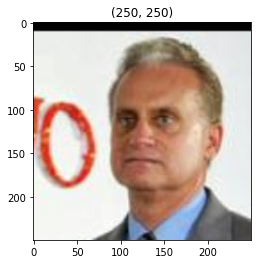

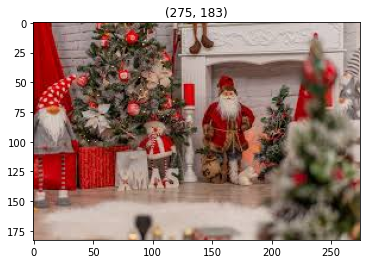

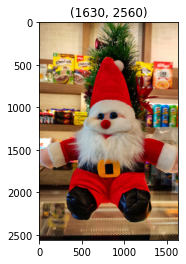

In [161]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.linear_model import LogisticRegression
import os
from glob import glob
import torch.optim as optim
from torch.utils.data import DataLoader, Subset #데이터를 선언하면 항상 필요함. batch training 할 수 있게 해줌. batch 사이즈만큼 뽑아주는 기능
import matplotlib.pyplot as plt
from PIL import Image
import random
class CustomDataset(torch.utils.data.Dataset): #CustomDataset이라는 새 클래스를 정의하며, torch.utils.data.Dataset을 상속받아 PyTorch의 기본 데이터셋 기능을 확장합니다.
    def __init__(self, data_path, transform=None): #클래스의 생성자입니다. data_path는 이미지 파일 경로의 리스트이며, transform은 데이터에 적용할 이미지 변환 함수입니다.
        self.transform = transform #인스턴스 변수 self.transform에 생성자로 받은 transform을 저장합니다.
        self.data = data_path #인스턴스 변수 self.data에 생성자로 받은 이미지 파일 경로 리스트 data_path를 저장합니다.
        #이미지 파일 경로를 나타내는 문자열의 리스트 data_path의 각 요소 p를 '/'로 분리한 뒤 뒤에서 두 번째 요소(즉, 상위 폴더 이름)가 'santa'인지 확인합니다. 'santa'라면 True를, 그렇지 않다면 False를 반환합니다. 이 True/False 값을 int로 변환하여 1 또는 0으로 만듭니다. 이것이 각 이미지의 라벨이며, self.label 리스트에 저장됩니다.
        self.label = [int(p.split('/')[-2] == 'santa') for p in data_path]
        self.data_len = len(self.data)
        
    def __len__(self):
        return self.data_len
    
    def __getitem__(self, index):
        image = Image.open(self.data[index], mode='r') #index에 해당하는 이미지 파일을 열어 image 객체로 저장합니다.
        image = image.convert('RGB')
        
        if self.transform:
            image = self.transform(image) #설정된 이미지 변환(transform)이 있다면 이를 이미지에 적용합니다.
            
        self.label[index] = np.array(self.label[index])
        return image, torch.from_numpy(self.label[index]) #변환된 이미지와 해당 라벨을 튜플로 반환합니다. 라벨은 NumPy 배열을 PyTorch 텐서로 변환합니다.
    


train_mother_path = './tep/is_that_santa/train'
test_mother_path = './tep/is_that_santa/test'

#path의 하위폴더 내에 있는 파일들 모두 저장
train_image_path = glob(os.path.join(train_mother_path, '*', '*'))
test_image_path = glob(os.path.join(test_mother_path, '*', '*'))

#랜덤하게 추출하여 경로 확인
for _ in range(3):
    idx = np.random.randint(0, len(train_image_path))
    image = Image.open(train_image_path[idx])
    plt.imshow(image)
    plt.title(image.size)
    plt.show()



transform = transforms.Compose([transforms.Resize((32, 32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
train_data = CustomDataset(train_image_path, transform=transform) #정의된 transform에 따라 데이터셋 로딩
test_data = CustomDataset(test_image_path, transform=transform)

## Model Construction_MLP

In [162]:
model_MLP = nn.Sequential(
    nn.Linear(3072, 512), #3072 = 32*32*3 (RGB)
    nn.ReLU(),
    nn.Linear(512, 2)
)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_MLP.parameters(), lr=0.001)
num_epochs = 5

## Train Model & Select Model

In [163]:
# 첫 번째 샘플링에서 랜덤으로 100개의 인덱스를 선택
first_indices = random.sample(range(len(test_data)), 100)

# 첫 번째 샘플링에서 사용된 인덱스를 제외
remaining_indices = list(set(range(len(test_data))) - set(first_indices))

# 남은 인덱스 중에서 두 번째 샘플링으로 100개의 인덱스를 선택
second_indices = random.sample(remaining_indices, 100)

# 첫 번째 서브셋 데이터셋을 생성
first_subset_test_dataset = Subset(test_data, first_indices)

# 두 번째 서브셋 데이터셋을 생성
second_subset_test_dataset = Subset(test_data, second_indices)



batch_size = 32

train_loader = DataLoader(dataset=train_data, #어디에서
                          batch_size=batch_size, #얼만큼 뽑을지
                          shuffle=True,#random으로 뽑음. False는 처음부터 100개씩
                         drop_last=True)  #batch_size가 안되는 나머지 버리기. 이거 안하면 나중 코드에서 batch_size관련 오류 날 수 있음
val_loader = DataLoader(dataset=first_subset_test_dataset,
                         batch_size=batch_size,
                         shuffle=False) #test는 배치트레이닝이 의미가 없음. 굳이 셔플할 필요 없음.
test_loader = DataLoader(dataset=second_subset_test_dataset,
                         batch_size=batch_size,
                         shuffle=False) #test는 배치트레이닝이 의미가 없음. 굳이 셔플할 필요 없음.
batch_images, batch_labels = next(iter(train_loader))
print(batch_labels.numpy(), ", ", len(batch_labels.numpy())) #어떻게 뽑을래, 몇개를 뽑을래까지 저장이 되어있음. 


for epoch in range(num_epochs):

    total_batch = len(train_data) // Batch_size #total batch -> 600

    for i, (batch_images, batch_labels) in enumerate(train_loader): #train loader -> 뽑아낼게 더이상 없으면 for 문을 종료하는 기능까지 가지고 있음 /enumerate -> 순서까지 가져오는거

        X = batch_images.view(-1, 32 * 32 * 3) #이미지를 일자로 쫙펴서 넣어야 하니까 지금 쫙펴는 코드
        Y = batch_labels.long()
        

        pre = model_MLP(X)
        
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

print("Learning Finished!")

#Evaluate MLP
correct = 0
total = 0

for images, labels in first_subset_test_dataset:

    images  = images.view(-1, 32 * 32*3) #얘는 지금 아웃풋이 Cross Entropy Error임 그래서 확률을 볼려면 softmax를 다시 씌워줘야함
    outputs = model_MLP(images) #확률을 필요로 하지 않는다면 굳이 softmax 안 씌워줘도 됨

    _, predicted = torch.max(outputs.data, 1) #torch.max하는 이유는 가장 큰 확률은 볼 수 있기 때문. softmax를 하든 안하든 그 랭킹은 같기 때문에

    total += 1
    correct += (predicted == labels).sum()

print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ,  32
Epoch [1/5], lter [10/19], Loss: 0.6003
Epoch [2/5], lter [10/19], Loss: 0.4735
Epoch [3/5], lter [10/19], Loss: 0.3786
Epoch [4/5], lter [10/19], Loss: 0.3272
Epoch [5/5], lter [10/19], Loss: 0.2799
Learning Finished!
Accuracy of test images: 100.000000 %


## Model Construction_CNN

In [164]:
#CNN class 정의
class CNN(nn.Module): #자동으로 back propagation이 되게 함, nn.model 상속 받음
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential( #convolution에서는 이미지가 들어가면 이미지로 나옴. 원래 이미지를 3d의 피쳐로 만들겠다는 것임
            # 내부 순서는 마음대로 바꿔도 됨. conv+activation fuction, max pool이 오면 activation은 없음
            nn.Conv2d(3, 16, 5), #(채널갯수, 출력채널(임의 설정), 필터사이즈) 출력채널은 output의 depth. 필터가 16개 있다는 뜻
            nn.ReLU(),
            nn.Conv2d(16, 32, 5), #(채널갯수(바꿀 수 없음), 출력채널(바꿀 수 있음),필터사이즈(바꿀 수 있음))
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 3, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layer = nn.Sequential( #레이어를 짜는 것
            #nn.Linear(마지막 출력 채널*(conv_layer 이후 출력크기)) -> conv이후 출력은 (N+2P-F)/S+1
            nn.Linear(3*4*4, 2), 
            nn.ReLU(),
            #nn.Linear(10, 2) #output고정 왜냐면 최종적으로 2개의 클래스를 구분할거니까
        )

    def forward(self,x): #받았을 때 어떤 순서로 할 것인지를 정의
        out = self.conv_layer(x) #x를 받으면 conv 레이어에 넣고
        out = out.view(out.size(0), -1) #쫙 편다음에/-1과 out.size(0)순서 지킬 것
        
        out = self.fc_layer(out) #fc레이어에 줌
       
        return out

model_CNN = CNN()
loss = nn.CrossEntropyLoss() #loss는 cross-entropy-loss로 함. 
optimizer = optim.SGD(model_CNN.parameters(), lr=0.01)
num_epochs = 3


## Train Model & Select Model_CNN

In [165]:

for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):

        X = batch_images
        Y = batch_labels.long()

        pre = model_CNN(X) #이미지를 펴지 않고 바로 넣음 앞에 코드와 가장 다른 부분
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (j+1) % 10 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, j+1, total_batch, cost.item()))
correct_CNN = 0
total_CNN = 0

for images, labels in val_loader:

    images = images
    outputs = model_CNN(images)

    _, predicted = torch.max(outputs.data, 1)

    total_CNN += labels.size(0)
    correct_CNN += (predicted == labels).sum()

print('Accuracy of test images: %f %%' % (100 * float(correct_CNN) / total_CNN))




Accuracy of test images: 100.000000 %


## Performance

In [166]:
#ML models accuracy test
for model in models: 
    pre = model.predict(val_x)
    acc = accuracy(pre, val_y)
    if acc>=acc_prev:
        acc_prev=acc
        chosen=model
    print(model, acc)
print('Chosen model is: '+f'{chosen}'+'       Validation Accuracy is: ' +f'{acc_prev}')

#MLP
for images, labels in second_subset_test_dataset:

    images  = images.view(-1, 32 * 32*3) #얘는 지금 아웃풋이 Cross Entropy Error임 그래서 확률을 볼려면 softmax를 다시 씌워줘야함
    outputs = model_MLP(images) #확률을 필요로 하지 않는다면 굳이 softmax 안 씌워줘도 됨

    _, predicted = torch.max(outputs.data, 1) #torch.max하는 이유는 가장 큰 확률은 볼 수 있기 때문. softmax를 하든 안하든 그 랭킹은 같기 때문에

    total += 1
    correct += (predicted == labels).sum()

print('Accuracy of MLP test images: %f %%' % (100 * float(correct) / total))


for images, labels in test_loader:

    images = images
    outputs = model_CNN(images)

    _, predicted = torch.max(outputs.data, 1)

    total_CNN += labels.size(0)
    correct_CNN += (predicted == labels).sum()

print('Accuracy of CNN test images: %f %%' % (100 * float(correct_CNN) / total_CNN))



LogisticRegression(random_state=0) 0.84
DecisionTreeClassifier(max_depth=10, random_state=0) 0.8
SVC() 0.81
Chosen model is: LogisticRegression(random_state=0)       Validation Accuracy is: 0.84
Accuracy of MLP test images: 100.000000 %
Accuracy of CNN test images: 100.000000 %


The results explains
결과값은 각 모델의 정확도를 나타냅니다. 정확도는 전체 이미지 중 정답을 맞춘 이미지의 비율로 측정됩니다. 
모델 중 정확도가 높은 것은 MLP, CNN 두 모델이지만, 그림 데이터의 특성 상 CNN을 사용하는 것이 적합할 것으로 예상됩니다. 
그러나, 과제에서 사용된 데이터세트의 수가 적고, 직접 확인한 결과 구분하기 쉬운 데이터로 구성되었다는 한계가 있기 때문에, 실제 사용에 있어서는 주의가 필요합니다.